# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from queue import Queue
from math import sqrt

def distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1])**2)

def dbscan(points, n):
    cluster1 = []
    cluster2 = []
    cluster3 = []
    other = []
    d = [0 for _ in range(n)]
    nw = []
    for i in range(n):
        nw = []
        if d[i] == 0:
            d[i] = 1
            nw.append(i)
            q = Queue()
            q.put(i)
            while(not q.empty()):

                v = q.get()
                for u in range(n):
                    if(u == v): continue
                    if(d[u] == 0 and distance(points[u],points[v]) <= 1):
                        
                        nw.append(u)
                        q.put(u)
                        d[u] = 1
        if (len(nw) >= 30):
            if len(cluster1) < 30:
                cluster1 = nw
            elif len(cluster2) < 30:
                cluster2 = nw
            else:
                cluster3 = nw
        else:
            for qwe in range(len(nw)):
                other.append(nw[qwe])    
    return cluster1, cluster2, cluster3, other
        
def centroid(cl, points):
  c = (0, 0)
  most = 10000000000000
  for i in range(len(cl)):
    nw = 0
    for j in range(len(cl)):
      nw += distance((points[cl[i]]), (points[cl[j]]))
    if (nw < most):
      most = nw
      c = (points[cl[i]])
  return c

def ans(points, n):
    X = 0
    Y = 0
    for i in range(n):
        X += points[i][0]
        Y += points[i][1]
    avgx = (X) / n
    avgy = (Y) / n
    avgx *= 100000
    avgy *= 100000
    if(avgx > int(avgx)):
        X = int(avgx)
    else:
        X =  int(avgx) - 1
    if(avgy > int(avgy)):
        Y = int(avgy)
    else:
        Y = int(avgy)-1
    return X, Y

(43744, -47902)


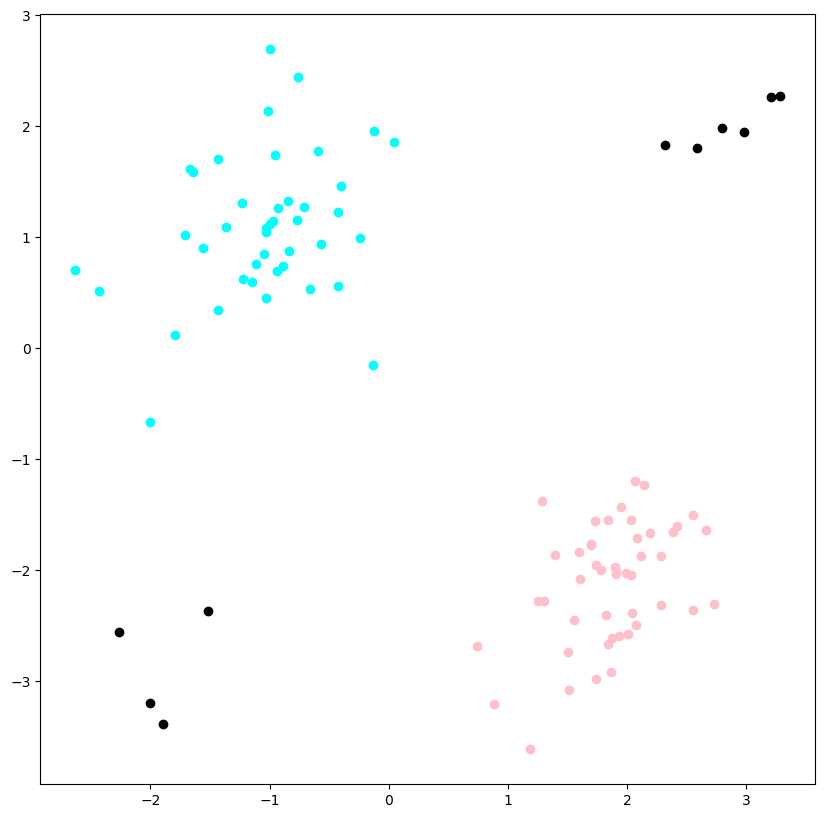

In [32]:
#### 1
file_path = '0.csv'

data = pd.read_csv(file_path, skiprows=1, delimiter = ';')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist() 
points = []
ln = len(x)
for i in range(ln):
  points.append((x[i], y[i]))
cl1, cl2, cl3, o = dbscan(points, ln)


point_1 = centroid(cl1, points)
point_2 = centroid(cl2, points)
c = []
c.append(point_1)
c.append(point_2)
print(ans(c, len(c)))

plt.figure(figsize=(10, 10))

X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='pink')

X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])
plt.scatter(X, Y, color='cyan')

X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='yellow')

X = []
Y = []
for i in range(len(o)):
  X.append(points[o[i]][0])
  Y.append(points[o[i]][1])

plt.scatter(X, Y, color='black')

plt.show()
#### 1

(99895, 100091)


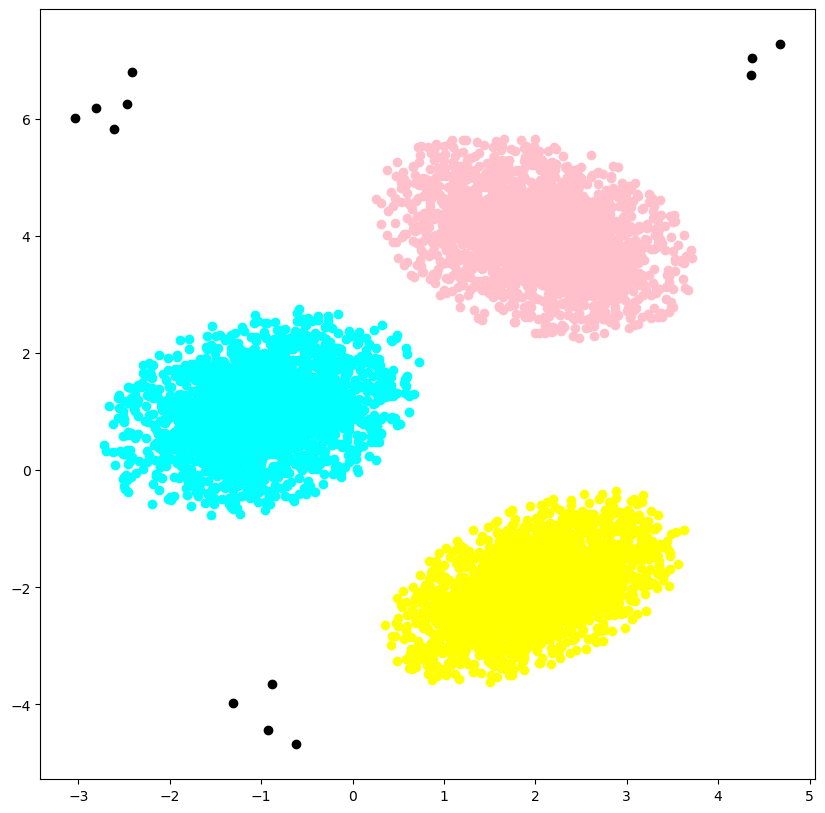

In [38]:
#### 2
def dbscan2(points, n):
    cluster1 = []
    cluster2 = []
    cluster3 = []
    other = []
    d = [0 for _ in range(n)]
    nw = []
    for i in range(n):
        nw = []
        if d[i] == 0:
            d[i] = 1
            nw.append(i)
            q = Queue()
            q.put(i)
            while(not q.empty()):

                v = q.get()
                for u in range(n):
                    if(u == v): continue
                    if(d[u] == 0 and distance(points[u],points[v]) <= 0.5):
                        
                        nw.append(u)
                        q.put(u)
                        d[u] = 1
        if (len(nw) >= 30):
            if len(cluster1) < 30:
                cluster1 = nw
            elif len(cluster2) < 30:
                cluster2 = nw
            else:
                cluster3 = nw
        else:
            for qwe in range(len(nw)):
                other.append(nw[qwe])    
    return cluster1, cluster2, cluster3, other
#### 1
file_path = '1.csv'

data = pd.read_csv(file_path, skiprows=1, delimiter = ';')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist() 
points = []
ln = len(x)
for i in range(ln):
  points.append((x[i], y[i]))
cl1, cl2, cl3, o = dbscan2(points, ln)


point_1 = centroid(cl1, points)
point_2 = centroid(cl2, points)
point_3 = centroid(cl3, points)
c = []
c.append(point_1)
c.append(point_2)
c.append(point_3)
print(ans(c, len(c)))

plt.figure(figsize=(10, 10))

X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='pink')

X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])
plt.scatter(X, Y, color='cyan')

X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='yellow')

X = []
Y = []
for i in range(len(o)):
  X.append(points[o[i]][0])
  Y.append(points[o[i]][1])

plt.scatter(X, Y, color='black')

plt.show()
#### 1


#### 2

(515933, 498987)


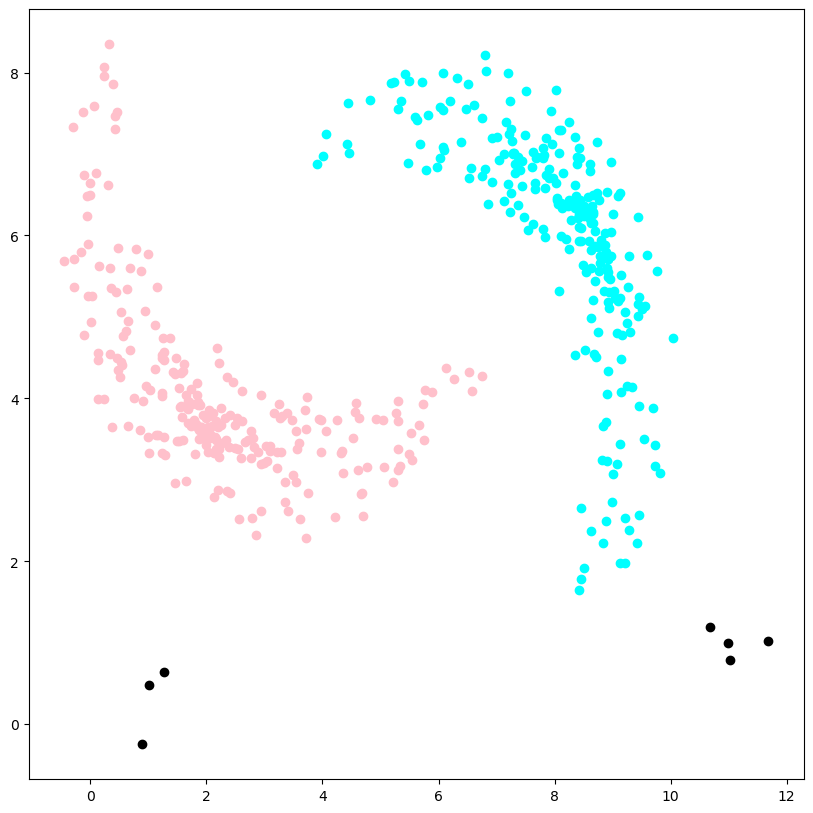

In [48]:
#### 3
#### 1
file_path = '2.txt'

data = pd.read_csv(file_path, skiprows=1, delimiter = ',')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist() 
points = []
ln = len(x)
for i in range(ln):
  points.append((x[i], y[i]))
cl1, cl2, cl3, o = dbscan(points, ln)


point_1 = centroid(cl1, points)
point_2 = centroid(cl2, points)
c = []
c.append(point_1)
c.append(point_2)
print(ans(c, len(c)))

plt.figure(figsize=(10, 10))

X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='pink')

X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])
plt.scatter(X, Y, color='cyan')

X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='yellow')

X = []
Y = []
for i in range(len(o)):
  X.append(points[o[i]][0])
  Y.append(points[o[i]][1])

plt.scatter(X, Y, color='black')

plt.show()
#### 1



#### 3

(471077, 409201)


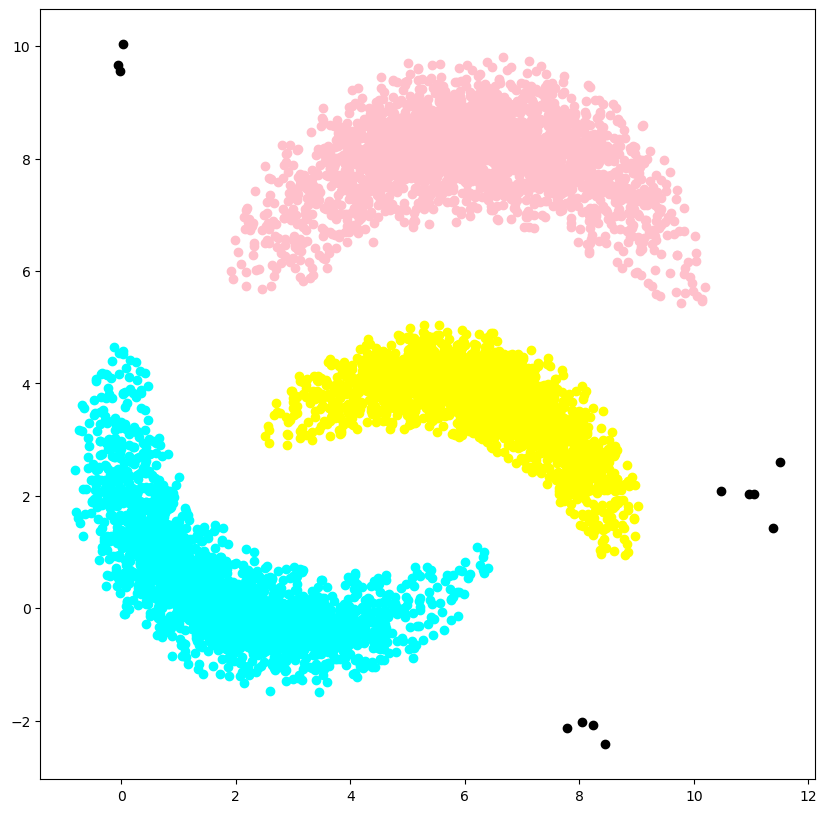

In [50]:
#### 4
file_path = '3.txt'

data = pd.read_csv(file_path, skiprows=1, delimiter = ',')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist() 
points = []
ln = len(x)
for i in range(ln):
  points.append((x[i], y[i]))
cl1, cl2, cl3, o = dbscan2(points, ln)


point_1 = centroid(cl1, points)
point_2 = centroid(cl2, points)
point_3 = centroid(cl3, points)
c = []
c.append(point_1)
c.append(point_2)
c.append(point_3)
print(ans(c, len(c)))

plt.figure(figsize=(10, 10))

X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='pink')

X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])
plt.scatter(X, Y, color='cyan')

X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='yellow')

X = []
Y = []
for i in range(len(o)):
  X.append(points[o[i]][0])
  Y.append(points[o[i]][1])

plt.scatter(X, Y, color='black')

plt.show()
#### 1



#### 4

(528073, 71781)


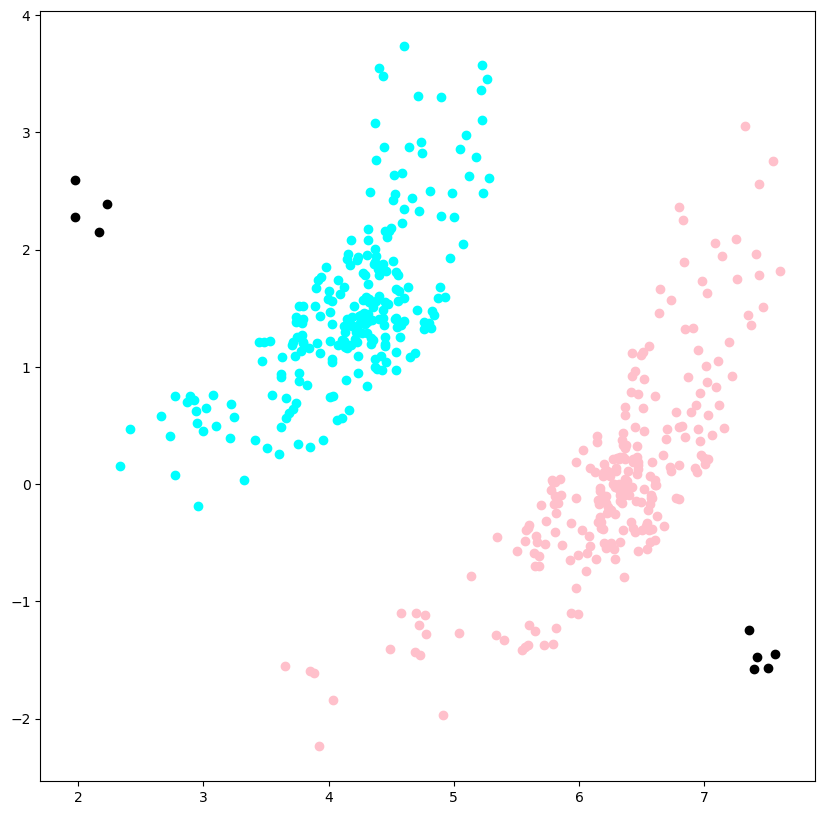

In [52]:
#### 5

#### 3
#### 1
file_path = '4.txt'

data = pd.read_csv(file_path, skiprows=0, delimiter = ',')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist() 
points = []
ln = len(x)
for i in range(ln):
  points.append((x[i], y[i]))
cl1, cl2, cl3, o = dbscan(points, ln)


point_1 = centroid(cl1, points)
point_2 = centroid(cl2, points)
c = []
c.append(point_1)
c.append(point_2)
print(ans(c, len(c)))

plt.figure(figsize=(10, 10))

X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='pink')

X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])
plt.scatter(X, Y, color='cyan')

X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='yellow')

X = []
Y = []
for i in range(len(o)):
  X.append(points[o[i]][0])
  Y.append(points[o[i]][1])

plt.scatter(X, Y, color='black')

plt.show()
#### 1



#### 3


#### 5

(669946, 370701)


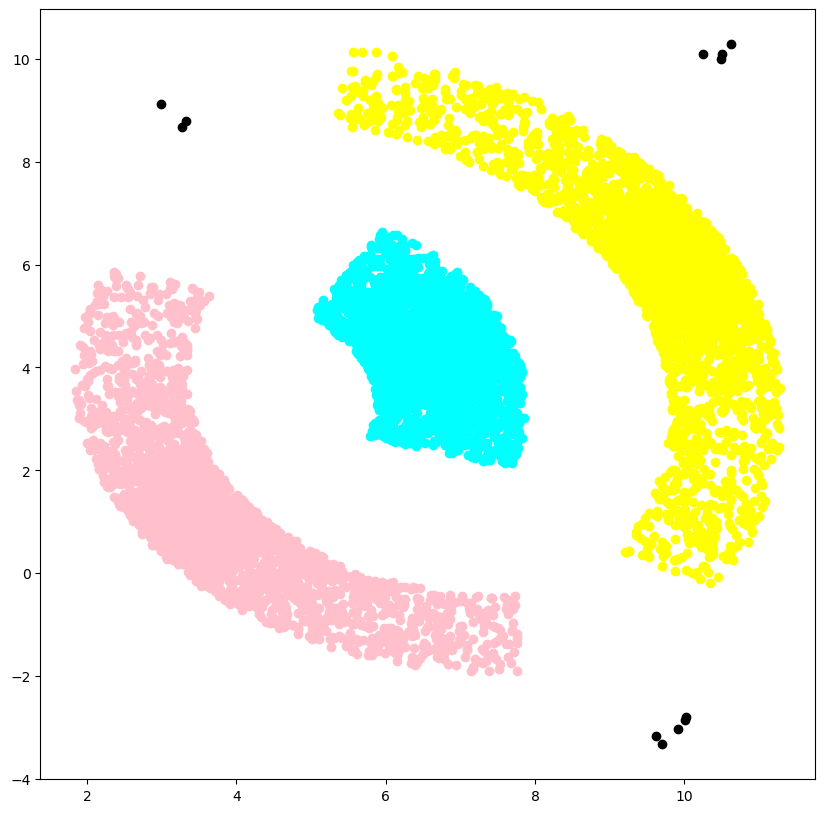

In [54]:
#### 6

#### 4
file_path = '5.txt'

data = pd.read_csv(file_path, skiprows=0, delimiter = ',')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist() 
points = []
ln = len(x)
for i in range(ln):
  points.append((x[i], y[i]))
cl1, cl2, cl3, o = dbscan2(points, ln)


point_1 = centroid(cl1, points)
point_2 = centroid(cl2, points)
point_3 = centroid(cl3, points)
c = []
c.append(point_1)
c.append(point_2)
c.append(point_3)
print(ans(c, len(c)))

plt.figure(figsize=(10, 10))

X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='pink')

X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])
plt.scatter(X, Y, color='cyan')

X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='yellow')

X = []
Y = []
for i in range(len(o)):
  X.append(points[o[i]][0])
  Y.append(points[o[i]][1])

plt.scatter(X, Y, color='black')

plt.show()
#### 1



#### 4


#### 6

# Кластеризация (1 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =  
dbscan = 

clustering_algorithms = (
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("OPTICS", optics),
        ("Gaussian\nMixture", gmm),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()